# Lab№3 "Unsupervised Learning"

Olena Babii (IASA student, DA-01)

In [284]:
import pandas as pd
# first of all importing pandas

In [285]:
# loading data from the CSV file 
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [286]:
print(train_data.shape)
# printing the first 7 lines
train_data.head(7)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [287]:
print(test_data.shape)
# printing the first 7 lines
test_data.head(7)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [288]:
print(train_data.dtypes)
# display all features with their data types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [289]:
# print number of null values in each column of the train data
print("Train dataset:\n")
for column in train_data.columns:
    null_count = train_data[column].isnull().sum()
    print(f"{column}: {null_count}")
    
# Print number of null values in each column of the test data
print("\nTest dataset:\n")
for column in test_data.columns:
    null_count = test_data[column].isnull().sum()
    print(f"{column}: {null_count}")

Train dataset:

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2

Test dataset:

PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


In [290]:
# fill missing values in the 'Age' column of the training data with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
# fill missing values in the 'Embarked' column of the training data with the mode (most frequent value)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
# Drop columns that are not needed for the machine learning model (PassengerId, Cabin, Name, Ticket) from the training data
train_data.drop(['PassengerId', 'Cabin', 'Name', 'Ticket', 'Survived'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

In [291]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
X = train_data
scaler = StandardScaler()
# apply StandardScaler's fit_transform method to X to scale its features
X = scaler.fit_transform(X)
testing = scaler.fit_transform(test)

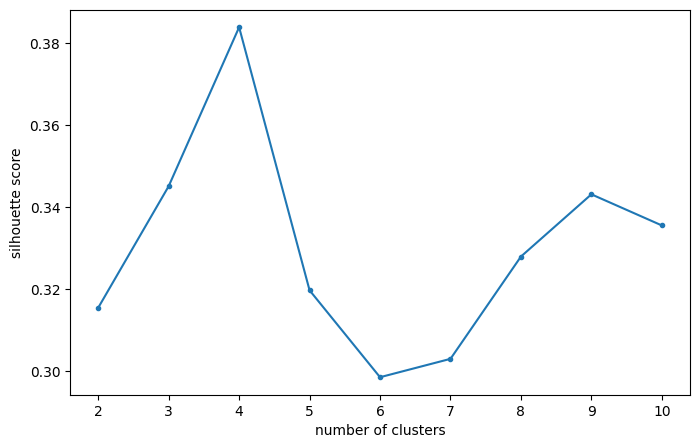

In [293]:
#find the optimal number of clusters
scores = [silhouette_score(X, GaussianMixture(n_components=k, random_state=42).fit(X).predict(X)) for k in range(2, 11)]

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), scores, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

looking at the graph, you can see that 4 clusters is the best option, so we will use it

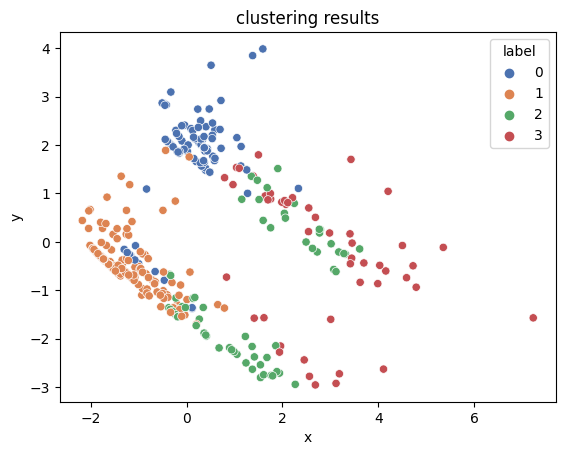

In [294]:
gaussian_mixture = GaussianMixture(n_components=4, random_state=100)
gaussian_mixture.fit(testing)

labels = gaussian_mixture.predict(testing)

pca = PCA(n_components=2)
pca.fit(testing)

testing_pca = pca.transform(testing)

data_frame = pd.DataFrame({'x': testing_pca[:, 0], 'y': testing_pca[:, 1], 'label': labels})
sns.scatterplot(data=data_frame, x='x', y='y', hue='label', palette='deep')
plt.title('clustering results')
plt.show()